In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
df_Texas_Covid_case = pd.read_excel("../Texas COVID-19 Active Case Data by County.xlsx",header=2)

In [3]:
a = df_Texas_Covid_case.set_index('County')

In [4]:
a.index

Index(['Anderson', 'Andrews', 'Angelina', 'Aransas', 'Archer', 'Armstrong',
       'Atascosa', 'Austin', 'Bailey', 'Bandera',
       ...
       'Willacy', 'Williamson', 'Wilson', 'Winkler', 'Wise', 'Wood', 'Yoakum',
       'Young', 'Zapata', 'Zavala'],
      dtype='object', name='County', length=254)

In [5]:
b = a.sum(axis=0)

In [6]:
b

Active\r\r\r\r\r\nCases\r\r\r\r\r\n4-7      7536
Active\r\r\r\r\r\nCases\r\r\r\r\r\n4-8      8397
Active\r\r\r\r\r\nCases\r\r\r\r\r\n4-9      8919
Active\r\r\r\r\r\nCases\r\r\r\r\r\n4-10    10067
Active\r\r\r\r\r\nCases\r\r\r\r\r\n4-11    10682
                                           ...  
Active Cases 06-12                         34459
Active Cases 06-13                         35698
Active Cases 06-14                         36306
Active Cases 06-15                         36622
Active Cases 06-16                         38656
Length: 71, dtype: int64

In [7]:
dated_dict = {}
count = 0
for x in b:
    month_temp = int(b.index[count][-5:].split('-')[0])
    day_temp = int(b.index[count][-5:].split('-')[1])
    dated_dict[datetime.datetime(2020, month_temp, day_temp)] = b[count]
    count += 1

In [8]:
dated_df = pd.DataFrame(dated_dict.items(), columns=['Date', 'Active Cases'])

In [9]:
c = dated_df.set_index('Date')

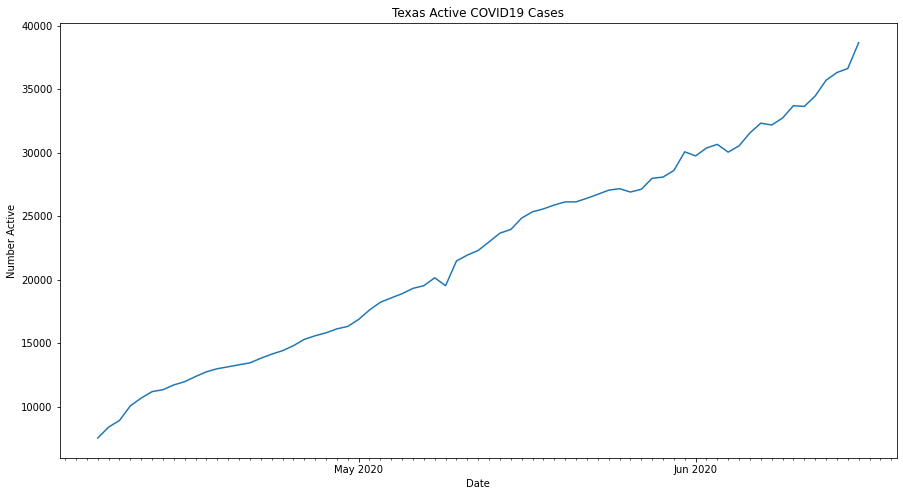

In [10]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Number Active',color='black')
plt.plot(c)
plt.title('Texas Active COVID19 Cases')
plt.savefig('TexasActive.png')

In [11]:
c

,Active Cases
Date,
2020-04-07,7536
2020-04-08,8397
2020-04-09,8919
2020-04-10,10067
2020-04-11,10682
...,...
2020-06-12,34459
2020-06-13,35698
2020-06-14,36306


In [12]:
x = c.diff(periods = 1)

In [13]:
x

,Active Cases
Date,
2020-04-07,NaN
2020-04-08,861.0
2020-04-09,522.0
2020-04-10,1148.0
2020-04-11,615.0
...,...
2020-06-12,820.0
2020-06-13,1239.0
2020-06-14,608.0


In [14]:
x.rename(columns={'Active Cases':'Change In Active Cases'}, inplace = True)

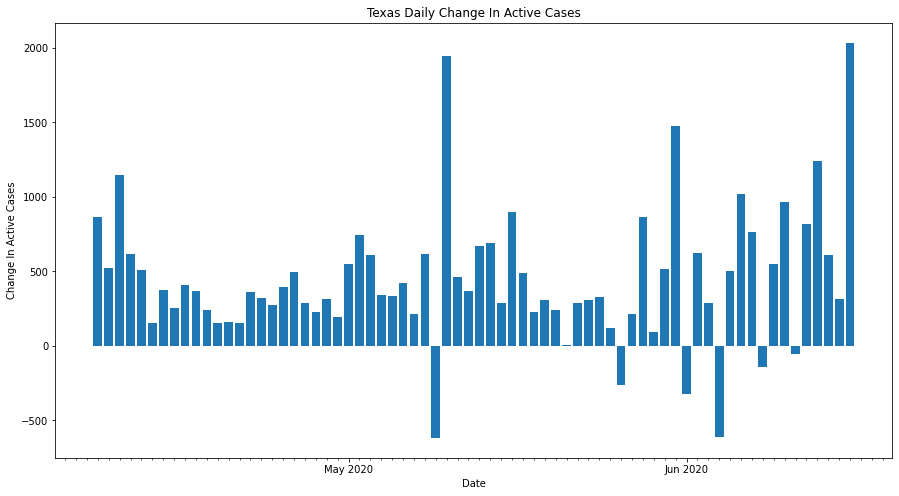

In [15]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Change In Active Cases',color='black')
plt.title('Texas Daily Change In Active Cases')
plt.bar(x.index,x['Change In Active Cases'])
fig.savefig('TexasChangeInActiveCases.png')